In [12]:
import pandas as pd

# Use forward slashes for the file path
file_path = 'C:/Users/Win_10/Documents/Dr Josh/FY22-Ohio Schools Data - RD1.xlsx'

# Read Excel file into a DataFrame
df = pd.read_excel(file_path, sheet_name='Performance_Index')

# Display the first few rows of the DataFrame
print(df.head())

   District IRN                        District Name      County     Region  \
0         43901  East Cleveland City School District    Cuyahoga   Region 3   
1         45161                      Youngstown City    Mahoning   Region 5   
2         44230                       Lockland Local    Hamilton  Region 13   
3         48686             Jefferson Township Local  Montgomery  Region 10   
4         48694                Trotwood-Madison City  Montgomery  Region 10   

   Average Income  Administrator Expenditure Per Pupil FY22  \
0           29716                                   7092.59   
1           32791                                   3449.66   
2           38882                                   3607.25   
3           46581                                   5027.50   
4           36542                                   2523.07   

   Building Operation Expenditure Per Pupil FY22  \
0                                        4587.12   
1                                        6

In [13]:
import pandas as pd

# Assuming you have a DataFrame 'df'
# Replace 'df' with the actual name of your DataFrame

# Randomly shuffle the rows of the DataFrame
shuffled_df = df.sample(frac=1, random_state=42)  # frac=1 means all rows, random_state for reproducibility

# Display the first few rows of the shuffled DataFrame
print(shuffled_df.head())


     District IRN                              District Name      County  \
572         48496                             Highland Local      Medina   
289         44529                         North Olmsted City    Cuyahoga   
76          47548                Conotton Valley Union Local    Harrison   
78          45039                           Wellsville Local  Columbiana   
182         45443  Leetonia Exempted Village School District  Columbiana   

        Region  Average Income  Administrator Expenditure Per Pupil FY22  \
572   Region 8          144617                                   1128.70   
289   Region 3           60065                                   2333.95   
76   Region 12           53878                                   4167.88   
78    Region 5           42382                                   2562.99   
182   Region 5           47667                                   2347.55   

     Building Operation Expenditure Per Pupil FY22  \
572                             

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split


# Replace 'df' and column names with your actual DataFrame and column names

# Extracting the independent variable (IV) and dependent variable (DV)
X = df[['Instructional Expenditure Per Pupil FY22']]  # IV
y = df['Math Scores']  # DV

# Split the dataset into training and testing sets with an 80/20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the sizes of the training and testing sets
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))


Training set size: 484
Testing set size: 122


Mean Squared Error: 211.13387582606927
R-squared: 0.04319674623358405


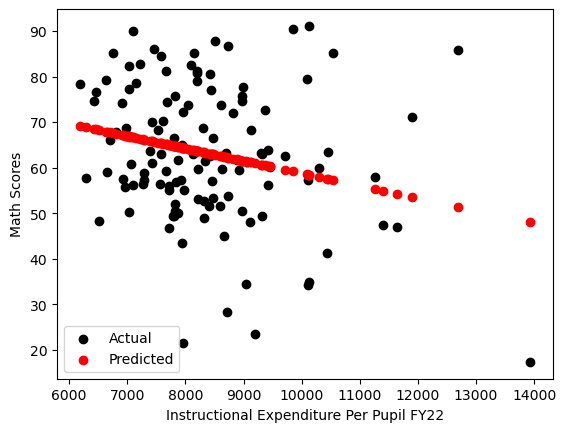

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with columns 'Average Income' and 'Math Scores'
# Replace 'df' and column names with your actual DataFrame and column names

# Extracting the independent variable (IV) and dependent variable (DV)
X = df[['Instructional Expenditure Per Pupil FY22']]   # IV (Independent Variable)
y = df['Math Scores']         # DV (Dependent Variable)

# Split the dataset into training and testing sets with an 80/20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualize the results
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.scatter(X_test, predictions, color='red', label='Predicted')
plt.xlabel('Instructional Expenditure Per Pupil FY22')
plt.ylabel('Math Scores')
plt.legend()
plt.show()


In [16]:
import pandas as pd
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Assuming you have a DataFrame 'df' with columns 'Average Income' and 'Math Scores'
# Replace 'df' and column names with your actual DataFrame and column names

# Extracting the independent variable (IV) and dependent variable (DV)
X = df[['Instructional Expenditure Per Pupil FY22']]   # IV (Independent Variable)
y = df['Math Scores']         # DV (Dependent Variable)

# Create a linear regression model
model = LinearRegression()

# Define k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize an array to store RMSE values for each fold
rmse_scores = []

# Perform cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate RMSE for the current fold
    rmse_fold = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Append the RMSE to the scores array
    rmse_scores.append(rmse_fold)

# Print the RMSE for each fold
for i, rmse in enumerate(rmse_scores, 1):
    print(f'Fold {i}: RMSE = {rmse}')

# Calculate and print the average RMSE across all folds
average_rmse = np.mean(rmse_scores)
print(f'Average RMSE across all folds: {average_rmse}')

# Fit the model on the entire dataset to access coefficients and intercept
model.fit(X, y)

# Access linear regression coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

print("Linear Regression Coefficients:", coefficients)
print("Linear Regression Intercept:", intercept)


Fold 1: RMSE = 14.530446511586259
Fold 2: RMSE = 14.344346636587629
Fold 3: RMSE = 14.199462517393084
Fold 4: RMSE = 13.110875750854216
Fold 5: RMSE = 14.461190520493197
Average RMSE across all folds: 14.129264387382875
Linear Regression Coefficients: [-0.00265195]
Linear Regression Intercept: 85.41055006739211
